# CityU_DataScience_Club_RL_Model

For those interested in building a gaming Reinforcement Learning model, here is a sample code.

Library versions used are compatible with Python 3.11

## Installing OpenAI Gym and Stable Baselines


In [1]:
# Import os for file path management
import os

# Import the Joypad wrapper
# Requires cpp version 14 or later
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros

# Import simplified controls for AI to learn faster
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

# Import  Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3 import PPO   # algorithm used for training the model

# Import Matplotlib to show impact of frame stacking
from matplotlib import pyplot as plt

## Setup Mario game

In [3]:
env = gym_super_mario_bros.make("SuperMarioBros-v3")
env = JoypadSpace(env, SIMPLE_MOVEMENT)  # simplifies actions
env.action_space

env.observation_space
print(env.observation_space.shape)


(240, 256, 3)


In [ ]:

"""
# Loop through each frame in the game
for frame in range(100000):
    if done:
        # Start or restart the game
        env.reset()
    # Pass an action for the game randomly: left, right, etc. from SIMPLE_MOVEMENT
    observation, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
"""

In [4]:
# Create a flag- restart or not
done = True

# Loop through each frame in the game
for frame in range(100000):
    if done:
        # Start or restart the game
        env.reset()
    # Pass an action for the game randomly: left, right, etc. from SIMPLE_MOVEMENT
    obs, reward, done = env.step(env.action_space.sample())  # corrected line
    # Show the game on the screen
    env.render()

# Closes the game
env.close()



c:\Users\Thaddeus Maximus\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\Thaddeus Maximus\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
c:\Users\Thaddeus Maximus\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


ValueError: not enough values to unpack (expected 5, got 4)

### Pre-process Environment

**`GrayScaleObservation`**
  - converts colored frames into grayscale to cut down on computation time and making the training faster


**`VecFrameStack`** 
  - capture several frames while playing the game, vectorize and stack them together. AI will be able to see the actions taken for those frames and learn from them


**`DummyVecEnv`**
  - wrap stacked frames with the dummy vector environment created for stable baseline and train agent in multiple environments at the same time

ValueError: too many values to unpack (expected 2)

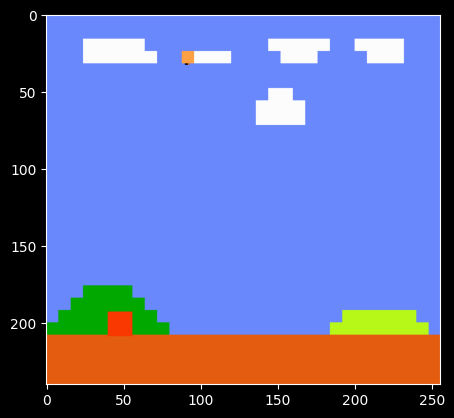

In [5]:
# Setup the base environment
env = gym_super_mario_bros.make("SuperMarioBros-v3")  # standard version
# Simplify the controls or actions
env = JoypadSpace(env, SIMPLE_MOVEMENT)

state = env.reset()
shp = state.shape

# Show original game frame
plt.imshow(state)

# Convert to gray scale to minimize data for preprocessing
env = GrayScaleObservation(env, keep_dim=True)
state = env.reset()  # Here's the additional reset after grayscale conversion

# Show game frame after gray scale conversion
plt.imshow(state)
shp

# Wrap inside the Dummy environment
env = DummyVecEnv([lambda: env])
state = env.reset()

# Show game frame after dummy environment vectorization
plt.imshow(state[0])
shp

# Stack 4 different frames or images together and apply channel order to last.
env = VecFrameStack(env, 4, channels_order="last")
state = env.reset()

# Show game frame after stacking frames
plt.imshow(state[0])
shp

state, reward, done, info = env.step([env.action_space.sample()])

# Show game frame after stacking
plt.figure(figsize=(20, 16))
for i in range(state.shape[3]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(state[0][:, :, i])
plt.show()
state = env.reset()

SIMPLE_MOVEMENT

# run several times to show mario jumping
state, reward, done, info = env.step([5])

# Show game frame after stacking frames
plt.figure(figsize=(20, 16)) 
for i in range(state.shape[3]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(state[0][:, :, i])
plt.show()

### Train the model

In [6]:
# Save training parameters, results, and logs
log_path = os.path.join("Training", "Logs")

# Create a Reinforcement Learning AI model
model = PPO(
    "CnnPolicy",
    env,
    verbose=1,
    tensorboard_log=log_path,
    learning_rate=0.000001,
    n_steps=512,
)

model.learn(
    total_timesteps=10000
)  # change to higher value for better results - may take hours without GPU


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


c:\Users\Thaddeus Maximus\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


TypeError: JoypadSpace.reset() got an unexpected keyword argument 'seed'

### Save the model

In [ ]:
model.save("mario_model_10000")

### Load the model

In [ ]:
model = PPO.load("mario_model_10000")

### Test the model

In [ ]:
state = env.reset()
while True:
    actions, _ = model.predict(state)
    state, reward, done, info = env.step(actions)
    env.render()
    if done:
        break